# **PURPOSE OF THIS NOTEBOOK**

This notebook aims to be the first step into the analysis of the data gathered by this project. There are other `notebooks` which try to showcase the process done to create and test the `model`.

<br>

## **CONTEXT**

The data processed here was gathered by the scripts that are hosted in the repository on which you are right now.

This data was taken from a personal laptop of one of the team members with the purpose of gathering data in the hopes of creating a model capable of **optimizing the power consumption of such device**, while also **diminishing the possible impacts on the performance of the device**. 

**The tools used** to gather the data used in this notebook were a combination of **CLI-based tools**, propietary APIs to obtain specific information from *CPU* and *GPU* vendors (i,e `Nvidia`, `AMD` and `Intel`)

Below you can find the steps done to process, clean and finally save a dataset ready to be served to a model.



<br>

---

## Step 1: Load the Data


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('laptop_stats.csv')

## Step 2: Basic Data Inspection


In [5]:
print("## Basic Info")


df.info()



## Basic Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87648 entries, 0 to 87647
Data columns (total 40 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   device_address                  87648 non-null  object 
 1   device_name                     87648 non-null  object 
 2   signal_strength (dBm)           87648 non-null  float64
 3   tx_power (dBm)                  87648 non-null  float64
 4   device_power_usage (W)          87648 non-null  float64
 5   cpu_power_state                 87648 non-null  object 
 6   gpu_power_usage (W)             87648 non-null  float64
 7   display_backlight_power (W)     87648 non-null  int64  
 8   idle_stats (%)                  87648 non-null  float64
 9   frequency_stats (GHz)           87648 non-null  float64
 10  wakeups_per_sec (Hz)            87648 non-null  float64
 11  battery_discharge_rate (W)      87648 non-null  float64
 12  energy_consumed (W

In [6]:
print("## First 5 Rows")
df.head()

## First 5 Rows


,device_address,device_name,signal_strength (dBm),tx_power (dBm),device_power_usage (W),cpu_power_state,gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),...,cpu_core_clock_avg (GHz),cpu_temperature (°C),cpu_power_limit (W),cpu_utilization_avg (%),cpu_undervolt_offset (V),gpu_undervolt_offset (V),ram_voltage (V),ram_frequency (MHz),ram_utilization (%),ram_cas_latency_cl
0,00:1A:7D:DA:71:06,Device_9,-54.071920,9.111096,2.791853,active,66.027321,5,56.495377,1.682557,...,2.384515,64.413007,103.495345,51.693620,0.041301,0.042307,1.400221,3600,55.380181,16
1,00:1A:7D:DA:71:09,Device_10,-51.884510,0.000000,3.282772,active,115.000000,6,50.587919,1.953289,...,1.990021,69.486743,90.146128,57.401727,0.034400,0.042561,1.500275,3600,48.193382,16
2,00:1A:7D:DA:71:00,Device_1,-9.140599,0.231838,5.700000,active,114.785998,7,41.280903,3.500000,...,2.410109,61.516194,81.475754,55.330247,0.041891,0.034728,1.597151,3600,55.471138,16
3,00:1A:7D:DA:71:08,Device_0,-14.053851,1.750462,5.800000,active,115.000000,8,100.000000,3.500000,...,2.186654,65.938746,94.423658,100.000000,0.000000,0.032254,1.455541,3600,100.000000,16
4,00:1A:7D:DA:71:11,Device_2,-64.369557,1.617212,5.900000,active,46.564421,9,90.780979,3.459665,...,1.835691,65.497072,105.728681,100.000000,0.000000,0.038879,1.487380,3600,100.000000,16


In [7]:


print("## Data Description")

df.describe()

## Data Description


,signal_strength (dBm),tx_power (dBm),device_power_usage (W),gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),wakeups_per_sec (Hz),battery_discharge_rate (W),energy_consumed (Wh),...,cpu_core_clock_avg (GHz),cpu_temperature (°C),cpu_power_limit (W),cpu_utilization_avg (%),cpu_undervolt_offset (V),gpu_undervolt_offset (V),ram_voltage (V),ram_frequency (MHz),ram_utilization (%),ram_cas_latency_cl
count,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,...,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.0,87648.000000,87648.0
mean,-46.570660,10.524125,3.653369,64.929397,10.000000,51.835324,1.886015,5.251554,5.291763,52.395000,...,1.870509,61.307967,95.066449,52.569108,0.051584,0.051983,1.500107,3600.0,58.391752,16.0
std,35.561133,8.076968,2.006108,41.741771,3.162296,40.409015,1.438948,4.038025,3.985313,40.270714,...,1.439408,25.399640,8.656189,40.335633,0.040360,0.040248,0.057867,0.0,36.897792,0.0
min,-100.000000,0.000000,0.600000,10.000000,5.000000,0.000000,0.100000,0.000000,0.100000,0.100000,...,0.100000,30.000000,80.000120,0.000000,0.000000,0.000000,1.400002,3600.0,9.002000,16.0
25%,-79.962820,1.710989,1.600000,19.453874,7.000000,8.207509,0.304431,0.854667,0.956294,8.469695,...,0.299810,33.219513,87.565572,8.551359,0.007992,0.008417,1.449785,3600.0,18.468168,16.0
50%,-45.233969,12.095059,3.918379,69.853261,10.000000,56.705306,2.360154,5.978004,6.025684,59.655176,...,2.283541,68.242401,95.101285,59.451600,0.056196,0.057739,1.500322,3600.0,65.808733,16.0
75%,-9.232570,18.798955,5.600000,108.053116,13.000000,93.789276,3.395612,9.412355,9.385366,93.631402,...,3.388516,88.414871,102.606286,93.922343,0.093579,0.093626,1.550223,3600.0,97.746056,16.0
max,0.000000,20.000000,6.500000,115.000000,15.000000,100.000000,3.500000,10.000000,10.000000,100.000000,...,3.500000,90.000000,109.999807,100.000000,0.100000,0.100000,1.600000,3600.0,100.000000,16.0


## Step 3: Checking if we got missing values




In [8]:
print("n## Missing Values")
print(df.isnull().sum())

n## Missing Values
device_address                    0
device_name                       0
signal_strength (dBm)             0
tx_power (dBm)                    0
device_power_usage (W)            0
cpu_power_state                   0
gpu_power_usage (W)               0
display_backlight_power (W)       0
idle_stats (%)                    0
frequency_stats (GHz)             0
wakeups_per_sec (Hz)              0
battery_discharge_rate (W)        0
energy_consumed (Wh)              0
software_activity_impact (W)      0
package_power_state               0
estimated_power_savings (W)       0
thermal_power_management (W)      0
disk_io_power_usage (W)           0
wireless_radio_power_usage (W)    0
power_usage_trends (W)            0
system_base_power (W)             0
wakeups_from_idle (Hz)            0
average_cpu_frequency (GHz)       0
network_latency (ms)              0
gpu_core_clock (GHz)              0
gpu_memory_clock (GHz)            0
gpu_temperature (°C)              0
gpu_power


**We dont have missing values, this is expected because we cleaned the data while gathering it**

In [9]:
df.describe(include='all')

,device_address,device_name,signal_strength (dBm),tx_power (dBm),device_power_usage (W),cpu_power_state,gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),...,cpu_core_clock_avg (GHz),cpu_temperature (°C),cpu_power_limit (W),cpu_utilization_avg (%),cpu_undervolt_offset (V),gpu_undervolt_offset (V),ram_voltage (V),ram_frequency (MHz),ram_utilization (%),ram_cas_latency_cl
count,87648,87648,87648.000000,87648.000000,87648.000000,87648,87648.000000,87648.000000,87648.000000,87648.000000,...,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.000000,87648.0,87648.000000,87648.0
unique,12,12,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,00:1A:7D:DA:71:05,Device_7,NaN,NaN,NaN,active,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,7444,7387,NaN,NaN,NaN,74447,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,-46.570660,10.524125,3.653369,NaN,64.929397,10.000000,51.835324,1.886015,...,1.870509,61.307967,95.066449,52.569108,0.051584,0.051983,1.500107,3600.0,58.391752,16.0
std,NaN,NaN,35.561133,8.076968,2.006108,NaN,41.741771,3.162296,40.409015,1.438948,...,1.439408,25.399640,8.656189,40.335633,0.040360,0.040248,0.057867,0.0,36.897792,0.0
min,NaN,NaN,-100.000000,0.000000,0.600000,NaN,10.000000,5.000000,0.000000,0.100000,...,0.100000,30.000000,80.000120,0.000000,0.000000,0.000000,1.400002,3600.0,9.002000,16.0
25%,NaN,NaN,-79.962820,1.710989,1.600000,NaN,19.453874,7.000000,8.207509,0.304431,...,0.299810,33.219513,87.565572,8.551359,0.007992,0.008417,1.449785,3600.0,18.468168,16.0
50%,NaN,NaN,-45.233969,12.095059,3.918379,NaN,69.853261,10.000000,56.705306,2.360154,...,2.283541,68.242401,95.101285,59.451600,0.056196,0.057739,1.500322,3600.0,65.808733,16.0
75%,NaN,NaN,-9.232570,18.798955,5.600000,NaN,108.053116,13.000000,93.789276,3.395612,...,3.388516,88.414871,102.606286,93.922343,0.093579,0.093626,1.550223,3600.0,97.746056,16.0


## STEP 4: Convert categorical variables into numeric encodings

In [10]:
df['cpu_power_state_encoded'] = df['cpu_power_state'].apply(lambda x: 1 if x == 'active' else 0)
df.drop(columns=['cpu_power_state'], inplace=True)
df['cpu_power_state_encoded'].head()



0    1
1    1
2    1
3    1
4    1
Name: cpu_power_state_encoded, dtype: int64

<br>

**one-hot encoding for the devices**

In [11]:
# Perform one-hot encoding for 'device_address' and 'device_name' columns


df = pd.get_dummies(df, columns=['device_address', 'device_name'])

df.head()



,signal_strength (dBm),tx_power (dBm),device_power_usage (W),gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),wakeups_per_sec (Hz),battery_discharge_rate (W),energy_consumed (Wh),...,device_name_Device_10,device_name_Device_11,device_name_Device_2,device_name_Device_3,device_name_Device_4,device_name_Device_5,device_name_Device_6,device_name_Device_7,device_name_Device_8,device_name_Device_9
0,-54.071920,9.111096,2.791853,66.027321,5,56.495377,1.682557,5.501938,4.307551,56.388635,...,False,False,False,False,False,False,False,False,False,True
1,-51.884510,0.000000,3.282772,115.000000,6,50.587919,1.953289,0.222247,4.879807,46.908387,...,True,False,False,False,False,False,False,False,False,False
2,-9.140599,0.231838,5.700000,114.785998,7,41.280903,3.500000,0.760281,4.936206,0.100000,...,False,False,False,False,False,False,False,False,False,False
3,-14.053851,1.750462,5.800000,115.000000,8,100.000000,3.500000,1.300561,4.613484,0.100000,...,False,False,False,False,False,False,False,False,False,False
4,-64.369557,1.617212,5.900000,46.564421,9,90.780979,3.459665,0.315978,5.484134,74.061742,...,False,False,True,False,False,False,False,False,False,False


## Step 4.5: Convert back to a csv for training later

In [12]:
df.to_csv('laptop_stats_cleaned.csv', index=False)

## Step 5: Data Visualization



/tmp/ipykernel_96418/2223977857.py:23: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(df[col].min(), df[col].max())


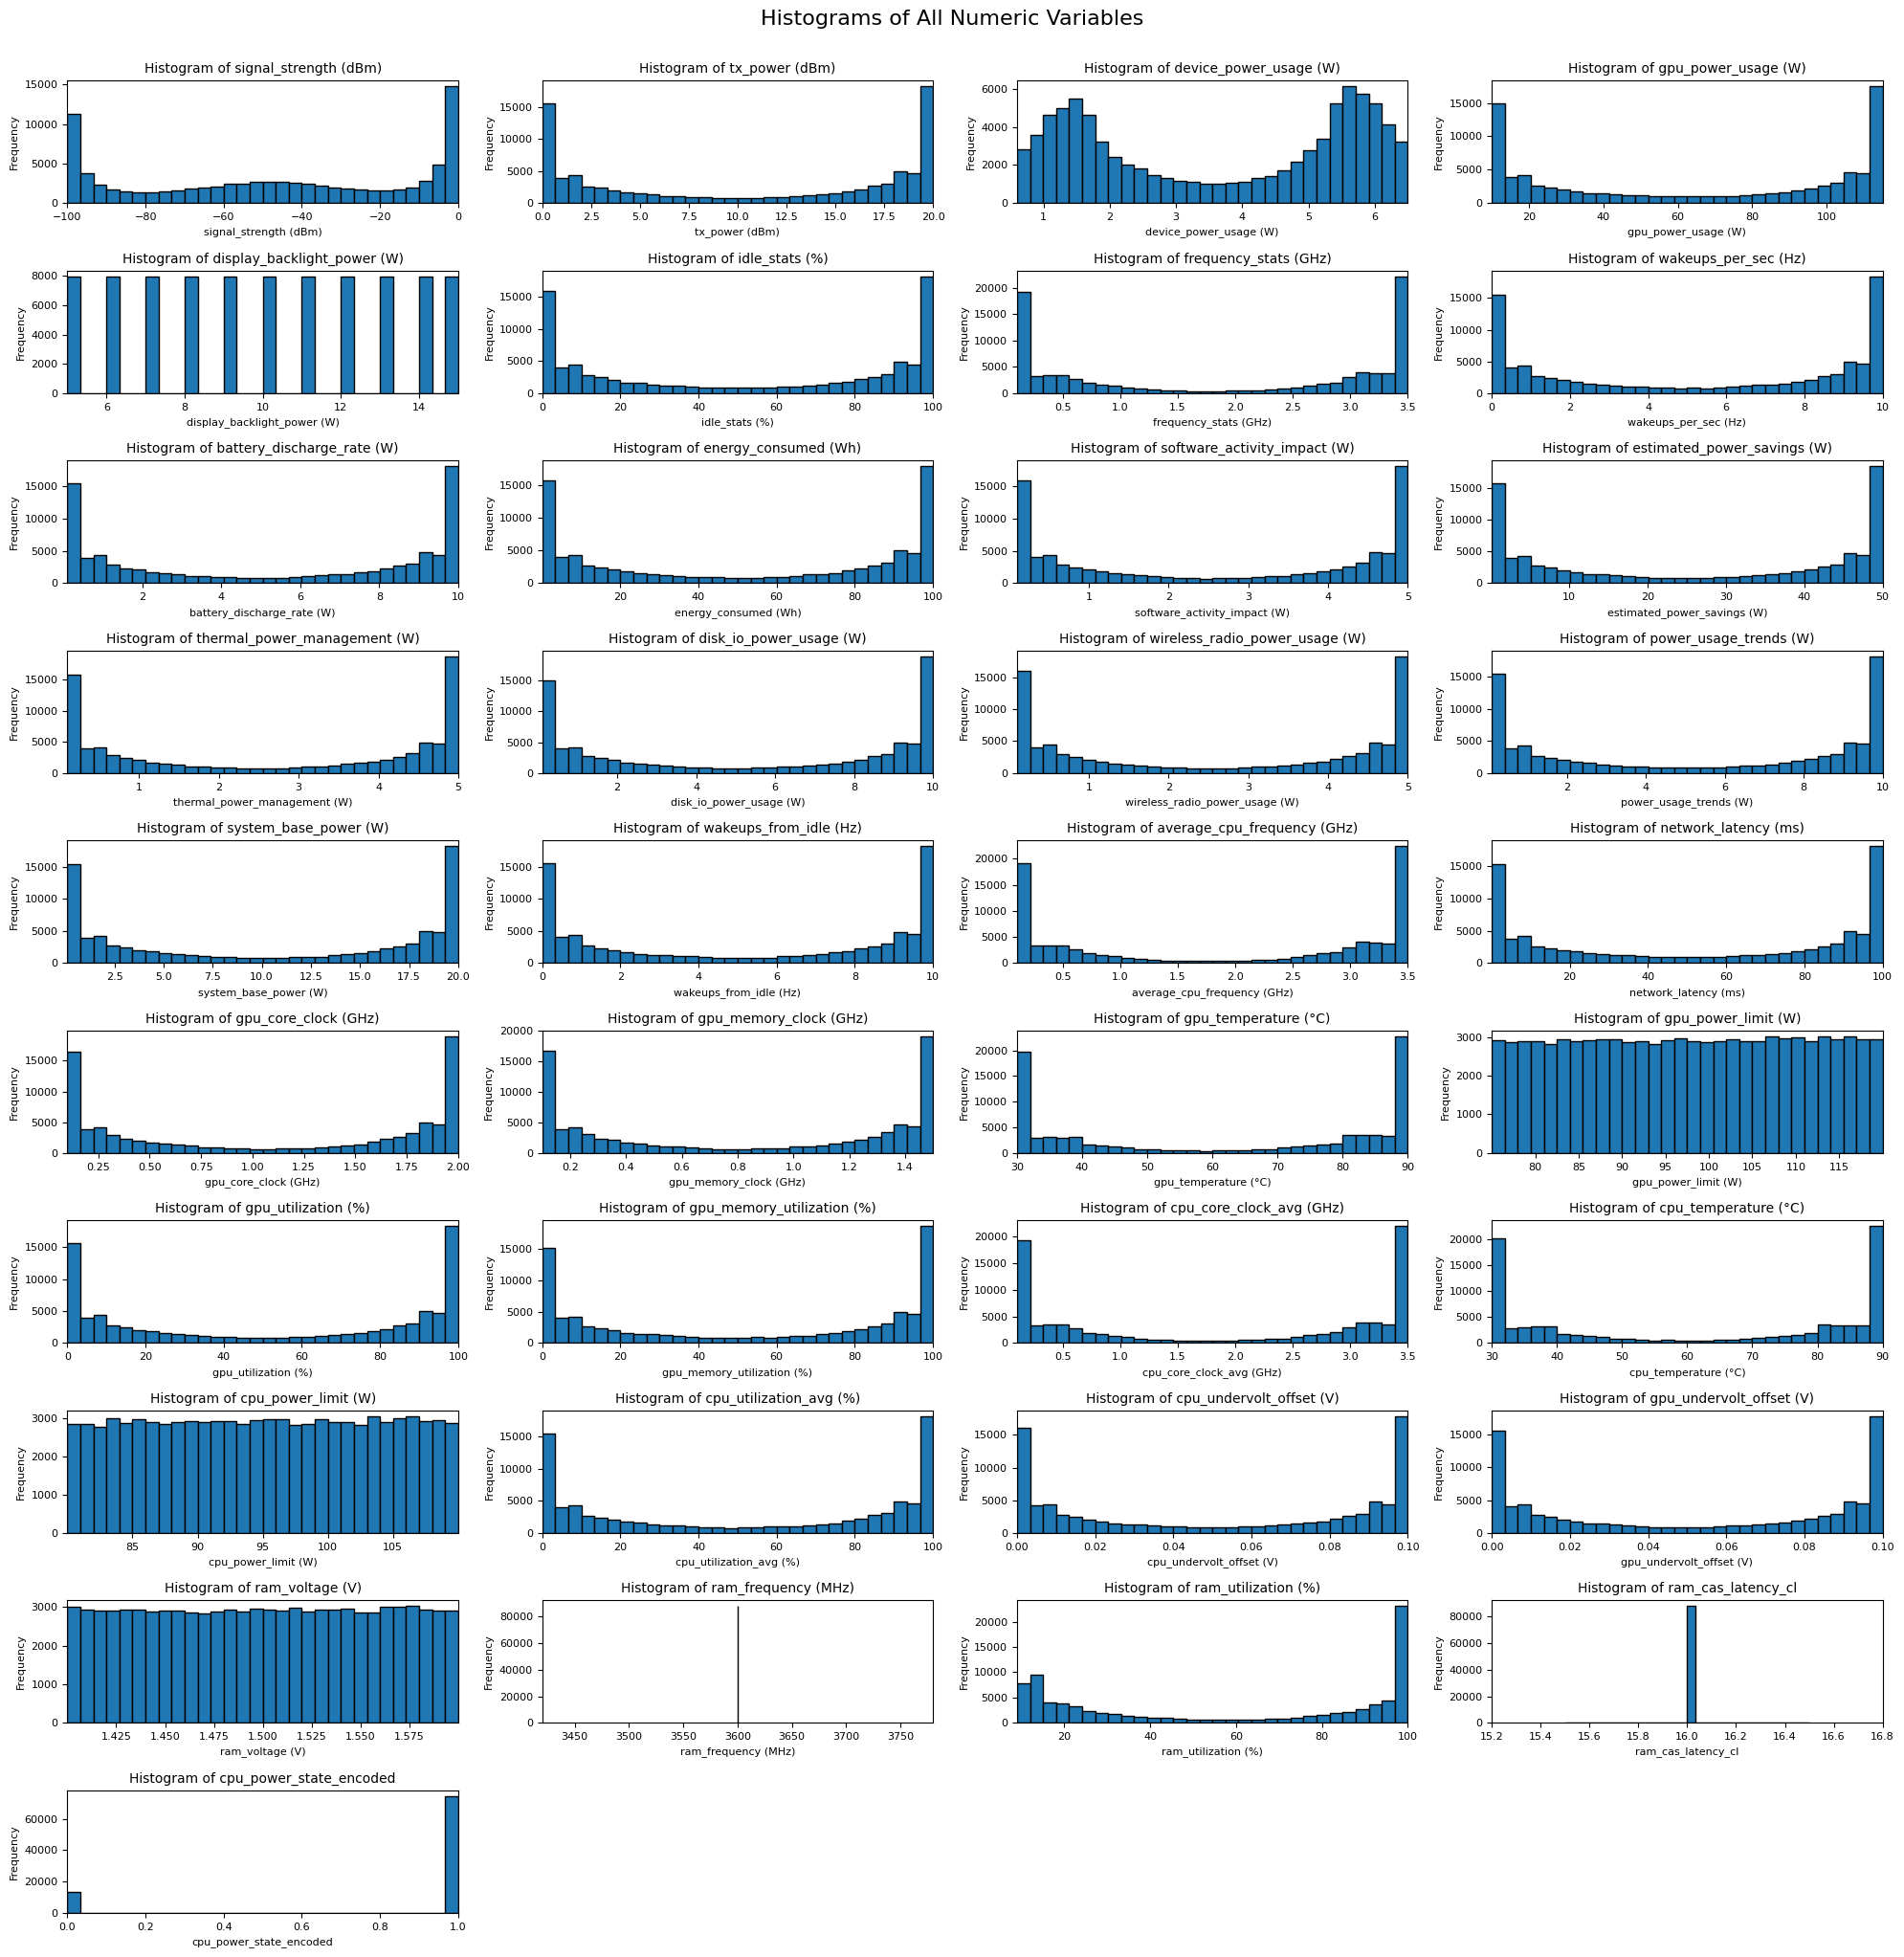

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset from a CSV file into a pandas DataFrame
df = pd.read_csv('laptop_stats_cleaned.csv')

# Generate histograms for each numeric column
numeric_columns = df.select_dtypes(include=[np.number]).columns
num_cols = 4
num_rows = int(np.ceil(len(numeric_columns) / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numeric_columns):
    ax = axes[i]
    ax.hist(df[col], bins=30, edgecolor='black')
    ax.set_title(f'Histogram of {col}', fontsize=10)
    ax.set_xlabel(col, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)
    ax.set_xlim(df[col].min(), df[col].max())
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)

# clean up empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.suptitle("Histograms of All Numeric Variables", fontsize=16, y=1.02)
plt.show()


# Analysis of Histograms for All Numeric Variables

| Variable                     | Analysis                                                                                  |
|------------------------------|-------------------------------------------------------------------------------------------|
| **Signal Strength (dBm)**    | The signal strength is centered around -50 dBm. The majority of values range between -70 dBm and -30 dBm. There are fewer extreme values on either side. |
| **Tx Power (dBm)**           | The transmission power is mostly concentrated around 10 dBm. The range is between 0 and 20 dBm. |
| **Device Power Usage (W)**   | The device power usage has a bimodal distribution. Peaks around 1 W and 5 W, indicating two different modes of operation (e.g., idle and active states). |
| **GPU Power Usage (W)**      | The GPU power usage ranges from 10 W to 115 W. The distribution is centered around 60 W.  |
| **Display Backlight Power (W)** | The display backlight power is evenly distributed between 5 W and 15 W. This simulates different display configurations. |
| **Idle Stats (%)**           | The distribution shows higher frequencies at the extremes (0% and 100%). Indicates that the system is either fully idle or fully active most of the time. |
| **Frequency Stats (GHz)**    | The CPU frequency distribution is centered around 2 GHz. The majority of values range from 1.5 GHz to 2.5 GHz. |
| **Wakeups per Second (Hz)**  | The distribution shows peaks around 0 and 10 Hz. Indicates periods of high and low wakeup frequencies. |
| **Battery Discharge Rate (W)** | The distribution is centered around 5 W. Values range between 1 W and 9 W.             |
| **Energy Consumed (Wh)**     | The distribution shows a wide range of values. There is a peak around 50 Wh.              |
| **Software Activity Impact (W)** | The distribution is centered around 2.5 W. Values range between 1 W and 4 W.          |
| **Estimated Power Savings (W)** | The distribution shows a peak around 25 W. Indicates potential for significant power savings. |
| **Thermal Power Management (W)** | The distribution is centered around 2.5 W. Values range between 1 W and 4 W.          |
| **Disk I/O Power Usage (W)** | The distribution is centered around 5 W. Values range between 1 W and 9 W.               |
| **Wireless Radio Power Usage (W)** | The distribution is centered around 2.5 W. Values range between 1 W and 4 W.       |
| **Power Usage Trends (W)**   | The distribution is centered around 5 W. Values range between 2 W and 8 W.               |
| **System Base Power (W)**    | The distribution shows peaks around 5 W and 15 W. Suggests bimodal distribution.          |
| **Wakeups from Idle (Hz)**   | The distribution shows peaks around 0 and 10 Hz. Indicates periods of high and low wakeup frequencies. |
| **Average CPU Frequency (GHz)** | The distribution is centered around 2 GHz. Values range from 1.5 GHz to 2.5 GHz.      |
| **Network Latency (ms)**     | The distribution is centered around 50 ms. Values range from 20 ms to 80 ms.              |
| **GPU Core Clock (GHz)**     | The distribution is centered around 1 GHz. Values range from 0.8 GHz to 1.2 GHz.          |
| **GPU Memory Clock (GHz)**   | The distribution is centered around 0.75 GHz. Values range from 0.6 GHz to 0.9 GHz.       |
| **GPU Temperature (°C)**     | The distribution shows a wide range of values. There is a peak around 60°C.               |
| **GPU Power Limit (W)**      | The distribution shows a wide range of values. There is a peak around 100 W.              |
| **GPU Utilization (%)**      | The distribution shows peaks around 50%. Values range from 0% to 100%.                    |
| **GPU Memory Utilization (%)** | The distribution shows peaks around 50%. Values range from 0% to 100%.                  |
| **CPU Core Clock Avg (GHz)** | The distribution is centered around 2 GHz. Values range from 1.5 GHz to 2.5 GHz.          |
| **CPU Temperature (°C)**     | The distribution shows a wide range of values. There is a peak around 60°C.               |
| **CPU Power Limit (W)**      | The distribution shows a wide range of values. There is a peak around 100 W.              |
| **CPU Utilization Avg (%)**  | The distribution shows peaks around 50%. Values range from 0% to 100%.                    |
| **CPU Undervolt Offset (V)** | The distribution is centered around 0.05 V. Values range from 0.03 V to 0.07 V.           |
| **GPU Undervolt Offset (V)** | The distribution is centered around 0.05 V. Values range from 0.03 V to 0.07 V.           |
| **RAM Voltage (V)**          | The distribution shows a narrow range of values between 1.4 V and 1.6 V.                  |
| **RAM Frequency (MHz)**      | The distribution shows a single value of 3600 MHz, indicating a fixed frequency.          |
| **RAM Utilization (%)**      | The distribution shows peaks around 50%. Values range from 10% to 90%.                    |
| **RAM CAS Latency CL**       | The distribution shows a single value of 16, indicating a fixed CAS latency.              |
| **CPU Power State Encoded**  | The distribution shows a binary classification, with 0 representing idle state and 1 representing active state. |


## INSIGHTS FROM THE ANALYSIS

1. We can drop the `RAM CAS latency CL`, since its always the same for our ram kits.

2. The `RAM Frequency(mhz)` get approximated to its most stable value of 3600 mhz so we can drop the column too.

3. The `Display Backlight POwer (W)` has different power consumption stages, we theorize that the 

4. We **FORGOT TO SCALE THE DATA**. It's important to scale the data since all of it has different scale values, so we have to do generate the csv again. UwU

5. We can observe that the data distribution is skewed to the extremes values, we think that this is a representation of the **HIGH USAGE** and **LOW USAGE** states of the laptop.

## NORMALIZING THE VALUES

In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Load the dataset
df = pd.read_csv('laptop_stats_cleaned.csv')

# Select numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Option 1: Standardization
scaler = StandardScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Save the normalized dataset to a CSV file
df.to_csv('laptop_stats_normalized.csv', index=False)


In [10]:
df.head()

,signal_strength (dBm),tx_power (dBm),device_power_usage (W),gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),wakeups_per_sec (Hz),battery_discharge_rate (W),energy_consumed (Wh),...,device_name_Device_10,device_name_Device_11,device_name_Device_2,device_name_Device_3,device_name_Device_4,device_name_Device_5,device_name_Device_6,device_name_Device_7,device_name_Device_8,device_name_Device_9
0,-0.210941,-0.174946,-0.429449,0.026303,-1.581139,0.115323,-0.141395,0.062007,-0.246961,0.099170,...,False,False,False,False,False,False,False,False,False,True
1,-0.149429,-1.302987,-0.184735,1.199539,-1.264911,-0.030870,0.046752,-1.245494,-0.103369,-0.136244,...,True,False,False,False,False,False,False,False,False,False
2,1.052561,-1.274283,1.020206,1.194412,-0.948683,-0.261191,1.121649,-1.112252,-0.089217,-1.298594,...,False,False,False,False,False,False,False,False,False,False
3,0.914397,-1.086263,1.070054,1.199539,-0.632456,1.191936,1.121649,-0.978453,-0.170196,-1.298594,...,False,False,False,False,False,False,False,False,False,False
4,-0.500518,-1.102761,1.119902,-0.439969,-0.316228,0.963792,1.093617,-1.222282,0.048270,0.538030,...,False,False,True,False,False,False,False,False,False,False


<br>

## Final Check before we wrap up the dataset


<br>

In [14]:
# Check if all columns are numerical and normalized

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

print("\nNumerical Columns\n", numerical_columns)
non_numerical_columns = df.select_dtypes(exclude=['float64', 'int64']).columns
print("\nNOn numerical columns:\n", non_numerical_columns)




Numerical Columns
 Index(['signal_strength (dBm)', 'tx_power (dBm)', 'device_power_usage (W)',
       'gpu_power_usage (W)', 'display_backlight_power (W)', 'idle_stats (%)',
       'frequency_stats (GHz)', 'wakeups_per_sec (Hz)',
       'battery_discharge_rate (W)', 'energy_consumed (Wh)',
       'software_activity_impact (W)', 'estimated_power_savings (W)',
       'thermal_power_management (W)', 'disk_io_power_usage (W)',
       'wireless_radio_power_usage (W)', 'power_usage_trends (W)',
       'system_base_power (W)', 'wakeups_from_idle (Hz)',
       'average_cpu_frequency (GHz)', 'network_latency (ms)',
       'gpu_core_clock (GHz)', 'gpu_memory_clock (GHz)',
       'gpu_temperature (°C)', 'gpu_power_limit (W)', 'gpu_utilization (%)',
       'gpu_memory_utilization (%)', 'cpu_core_clock_avg (GHz)',
       'cpu_temperature (°C)', 'cpu_power_limit (W)',
       'cpu_utilization_avg (%)', 'cpu_undervolt_offset (V)',
       'gpu_undervolt_offset (V)', 'ram_voltage (V)', 'ram_frequency (

### **INSIGHTS**

1. Lots of columns are shown as non numerical, but this is because they are boolean. For our purpose this does not matter since all python-based libraries correctly operate `False` as an `unsigned integer` with value `0` and `True` as an `unsigned integer` with value `1`
2. The only column that we forgot to encode was `package_power_state`

Lets fix that

In [16]:
final_df = pd.get_dummies(df, columns=['package_power_state'])

final_df.head()

,signal_strength (dBm),tx_power (dBm),device_power_usage (W),gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),wakeups_per_sec (Hz),battery_discharge_rate (W),energy_consumed (Wh),...,device_name_Device_2,device_name_Device_3,device_name_Device_4,device_name_Device_5,device_name_Device_6,device_name_Device_7,device_name_Device_8,device_name_Device_9,package_power_state_active,package_power_state_idle
0,-0.210941,-0.174946,-0.429449,0.026303,-1.581139,0.115323,-0.141395,0.062007,-0.246961,0.099170,...,False,False,False,False,False,False,False,True,True,False
1,-0.149429,-1.302987,-0.184735,1.199539,-1.264911,-0.030870,0.046752,-1.245494,-0.103369,-0.136244,...,False,False,False,False,False,False,False,False,True,False
2,1.052561,-1.274283,1.020206,1.194412,-0.948683,-0.261191,1.121649,-1.112252,-0.089217,-1.298594,...,False,False,False,False,False,False,False,False,True,False
3,0.914397,-1.086263,1.070054,1.199539,-0.632456,1.191936,1.121649,-0.978453,-0.170196,-1.298594,...,False,False,False,False,False,False,False,False,True,False
4,-0.500518,-1.102761,1.119902,-0.439969,-0.316228,0.963792,1.093617,-1.222282,0.048270,0.538030,...,True,False,False,False,False,False,False,False,True,False


In [18]:
# Check if all columns are numerical and normalized

numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns

print("\nNumerical Columns\n", numerical_columns)
non_numerical_columns = final_df.select_dtypes(exclude=['float64', 'int64']).columns
print("\nNOn numerical columns:\n", non_numerical_columns)



Numerical Columns
 Index(['signal_strength (dBm)', 'tx_power (dBm)', 'device_power_usage (W)',
       'gpu_power_usage (W)', 'display_backlight_power (W)', 'idle_stats (%)',
       'frequency_stats (GHz)', 'wakeups_per_sec (Hz)',
       'battery_discharge_rate (W)', 'energy_consumed (Wh)',
       'software_activity_impact (W)', 'estimated_power_savings (W)',
       'thermal_power_management (W)', 'disk_io_power_usage (W)',
       'wireless_radio_power_usage (W)', 'power_usage_trends (W)',
       'system_base_power (W)', 'wakeups_from_idle (Hz)',
       'average_cpu_frequency (GHz)', 'network_latency (ms)',
       'gpu_core_clock (GHz)', 'gpu_memory_clock (GHz)',
       'gpu_temperature (°C)', 'gpu_power_limit (W)', 'gpu_utilization (%)',
       'gpu_memory_utilization (%)', 'cpu_core_clock_avg (GHz)',
       'cpu_temperature (°C)', 'cpu_power_limit (W)',
       'cpu_utilization_avg (%)', 'cpu_undervolt_offset (V)',
       'gpu_undervolt_offset (V)', 'ram_voltage (V)', 'ram_frequency (

In [19]:
final_df.describe()

,signal_strength (dBm),tx_power (dBm),device_power_usage (W),gpu_power_usage (W),display_backlight_power (W),idle_stats (%),frequency_stats (GHz),wakeups_per_sec (Hz),battery_discharge_rate (W),energy_consumed (Wh),...,cpu_temperature (°C),cpu_power_limit (W),cpu_utilization_avg (%),cpu_undervolt_offset (V),gpu_undervolt_offset (V),ram_voltage (V),ram_frequency (MHz),ram_utilization (%),ram_cas_latency_cl,cpu_power_state_encoded
count,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,...,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,8.764800e+04,87648.0,8.764800e+04,87648.0,8.764800e+04
mean,-1.037667e-16,-9.241725e-17,1.655404e-16,-7.296099e-17,-5.026201e-18,-2.065607e-16,7.506875e-17,2.221257e-17,2.590926e-16,-3.327021e-16,...,4.076087e-16,-2.568227e-16,-1.167376e-17,1.977243e-16,2.253684e-16,-3.608002e-15,0.0,-2.010481e-17,0.0,-1.340050e-16
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.0,1.000006e+00,0.0,1.000006e+00
min,-1.502473e+00,-1.302987e+00,-1.522044e+00,-1.315941e+00,-1.581139e+00,-1.282774e+00,-1.241203e+00,-1.300533e+00,-1.302731e+00,-1.298594e+00,...,-1.232622e+00,-1.740537e+00,-1.303299e+00,-1.278122e+00,-1.291577e+00,-1.729934e+00,0.0,-1.338563e+00,0.0,-2.374763e+00
25%,-9.390125e-01,-1.091150e+00,-1.023564e+00,-1.089455e+00,-9.486833e-01,-1.079662e+00,-1.099132e+00,-1.088877e+00,-1.087868e+00,-1.090757e+00,...,-1.105867e+00,-8.665384e-01,-1.091293e+00,-1.080098e+00,-1.082451e+00,-8.696265e-01,0.0,-1.082011e+00,0.0,4.210947e-01
50%,3.758877e-02,1.944966e-01,1.321026e-01,1.179608e-01,0.000000e+00,1.205179e-01,3.295054e-01,1.799033e-01,1.841574e-01,1.802853e-01,...,2.730146e-01,4.024341e-03,1.706315e-01,1.142603e-01,1.430104e-01,3.715188e-03,0.0,2.010154e-01,0.0,4.210947e-01
75%,1.049975e+00,1.024503e+00,9.703576e-01,1.033113e+00,9.486833e-01,1.038238e+00,1.049104e+00,1.030411e+00,1.027178e+00,1.023986e+00,...,1.067222e+00,8.710392e-01,1.025234e+00,1.040521e+00,1.034649e+00,8.660685e-01,0.0,1.066582e+00,0.0,4.210947e-01
max,1.309602e+00,1.173204e+00,1.418990e+00,1.199539e+00,1.581139e+00,1.191936e+00,1.121649e+00,1.175940e+00,1.181404e+00,1.182131e+00,...,1.129630e+00,1.725175e+00,1.175912e+00,1.199621e+00,1.193019e+00,1.726262e+00,0.0,1.127669e+00,0.0,4.210947e-01


In [21]:
final_df.shape

(87648, 63)

In [20]:
## we save the final dataset to a CSV file

df.to_csv('laptop_stats_normalized.csv', index=False)


# NEXT STEPS

Now, on the next notebook we will train the model

In [3]:
import numpy as np

# Generate a linspace between 1 and 5 for 130 points
linspace_values = np.linspace(1, 5, 130)

# Print the generated values
print(linspace_values)


[1.         1.03100775 1.0620155  1.09302326 1.12403101 1.15503876
 1.18604651 1.21705426 1.24806202 1.27906977 1.31007752 1.34108527
 1.37209302 1.40310078 1.43410853 1.46511628 1.49612403 1.52713178
 1.55813953 1.58914729 1.62015504 1.65116279 1.68217054 1.71317829
 1.74418605 1.7751938  1.80620155 1.8372093  1.86821705 1.89922481
 1.93023256 1.96124031 1.99224806 2.02325581 2.05426357 2.08527132
 2.11627907 2.14728682 2.17829457 2.20930233 2.24031008 2.27131783
 2.30232558 2.33333333 2.36434109 2.39534884 2.42635659 2.45736434
 2.48837209 2.51937984 2.5503876  2.58139535 2.6124031  2.64341085
 2.6744186  2.70542636 2.73643411 2.76744186 2.79844961 2.82945736
 2.86046512 2.89147287 2.92248062 2.95348837 2.98449612 3.01550388
 3.04651163 3.07751938 3.10852713 3.13953488 3.17054264 3.20155039
 3.23255814 3.26356589 3.29457364 3.3255814  3.35658915 3.3875969
 3.41860465 3.4496124  3.48062016 3.51162791 3.54263566 3.57364341
 3.60465116 3.63565891 3.66666667 3.69767442 3.72868217 3.75968